# Clase 28.07

-  Parametro es lo que no podemos modificar, se guarda en en el aprendizaje y se actualiza mientras mas aprende
- Hiperparametro si lo podemos modificar , es una variable que toma por sentada una parte de su entrenamiento y la usa para entrenar. 

## Hiperparametros de nuestra red

- Ctantidad de NeuronaS
- Cantidad de capas
- Learning rate es Es un hiperparámetro que controla cuánto se ajustan los pesos de la red en cada iteración.
- Funcion activacion
- Batchsize 
- epocas

Nosotros lo que queremos hacer es tenemos un objetivo , es hacer que la red aprenda, y que encuentre el proceso de nuestra data. El problema son los recursos entonces tenemos un batch que tiene un subjconjunto del set original, y cada vez que te pase n observaciones actuliza los datos. 
Osea que por cada chunck calculo la perdida antes de hacer backpropagation. 
Si yo le pongo batchsize de 1 , se va a memorizar los datos y entonces va a overfittear

Las epocas es darle varias vueltas a todo el conjunto de datos, 1 vuelta de todo el conjunto de dato se llama epoca. entrenar solo 2-3 épocas en un problema complejo es muy malo lo ideal es hacerlo mas grande

## Entrenamienton y Prueba y Validacion

La validacion y el test la diferencia es una diferencia metodologica. El train ajusta los hiperparametros. Durante nuestra experimentacion de ver las metricas y hacer nuevas iteraciones del modelo son sobre la validacion.

La idea del test es que nunca lo haya visto, osea que sean nuevos. Para eso sirve el validation, para que la correccion sea sobre este ultimo

## Formas de Elegir Hiperparametros

### Grid Search

$n = (0.1,0.001, 0.0001)$
$f(z) = (sig, tanh , relu)$

Y de estas se combinan para formar un tuneo del parametro

El problema es que pesa mucho, crece exponencialmente, cada una de las combinaciones es un nuevo modelo. Es bien exacto ya que prueba todas las posibles combinaciones


### Random Search

Probamos de manera aleatoria, y de esas elige n combinaciones, pero el problema es que solamente funciona si el muestreo es suficietemente grande. 

El problema es que se queda en minimos locales, no explora para encontrar mas combinaciones que mejoren el modelo.


### Bayessian Optimization

Bayes me dice que 

$$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$$


Voy a variar un poco esa configuracion, si mejoro dice que en esa direccion me voy a mover. La idea es que en lugar que me voy a elegir combinaciones posibles. 

Si converges en varios distintos quiere decir que por ahi va tu verdadero minimo. 

## Overfitting

Solo aprendio los datos de entrenamiento.Debe de generalizar no de solo saber que es un set de datos. 

## Underfitting

Queremos llevar nuestro modelo a un punto en donde queremos que nuestro modelo no prediga de manera muy simple el modelo




### **Regularización**

La idea es **penalizar los pesos** para que el modelo no se vuelva demasiado complejo (evitar *overfitting*).

La función de pérdida queda así (ejemplo con Ridge):

$$
MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2 + \lambda \sum_j w_j^2
$$

* **Primer término:** error cuadrático medio (MSE).
* **Segundo término:** penalización de los pesos (regularización).
* **$\lambda$:** hiperparámetro que controla cuánto penalizamos.

---

### **Tipos**

1. **Ridge (L2):** penaliza la **suma de los cuadrados** de los pesos.

   $$
   \lambda \sum_j w_j^2
   $$
2. **Lasso (L1):** penaliza la **suma de los valores absolutos** de los pesos.

   $$
   \lambda \sum_j |w_j|
   $$

---

🔹 Con esto, el modelo **reduce la magnitud de los pesos** y evita que alguno tenga demasiada influencia.
🔹 Lasso incluso puede volver algunos pesos exactamente **cero** → selecciona variables.



RIDGE no puede llevar a valores a 0 en cambio a LASSO si los lleva  y mata neurona el hijo de perra

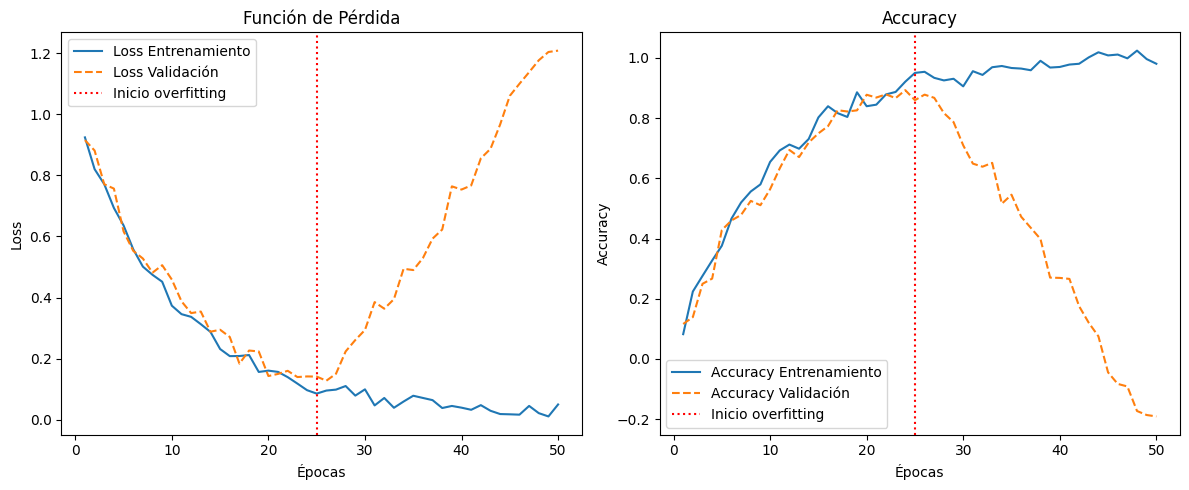

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulamos épocas
epochs = np.arange(1, 51)

# Simulamos pérdida (loss)
loss_train = np.exp(-epochs/10) + 0.05*np.random.rand(len(epochs))
loss_val = np.exp(-epochs/10) + 0.1*np.random.rand(len(epochs))
# Forzamos overfitting: validación empieza a subir en época 25
loss_val[25:] += (np.arange(len(epochs)-25)) * 0.05

# Simulamos accuracy
acc_train = 1 - loss_train + 0.05*np.random.rand(len(epochs))
acc_val = 1 - loss_val + 0.05*np.random.rand(len(epochs))

# Graficamos
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs, loss_train, label='Loss Entrenamiento')
plt.plot(epochs, loss_val, label='Loss Validación', linestyle='--')
plt.axvline(25, color='r', linestyle=':', label='Inicio overfitting')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Función de Pérdida')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, acc_train, label='Accuracy Entrenamiento')
plt.plot(epochs, acc_val, label='Accuracy Validación', linestyle='--')
plt.axvline(25, color='r', linestyle=':', label='Inicio overfitting')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


En el earling stoping lo que hacemos es hacer el corte en la epoca donde la perdida es minima

### Dropout 

Es donde la neurona la matamos, en donde lo hacemos para no depender de una neurona en especifico, y asi evitar el overfitting. Este es un hiperparametro que le podemos definir con probabildiad

# CLASE 04.08

## Optimizadores

Claro, aquí tienes una explicación clara y bien estructurada sobre el **Gradiente Descendente Simple**, su funcionamiento, problemas, y por qué se usan optimizadores más avanzados hoy en día, incluyendo una mención al **problema del gradiente desvanecido (vanishing gradient)**:

---

## 📉 Gradiente Descendente Simple

### ¿Qué es?

El **gradiente descendente** es un algoritmo de optimización que busca **minimizar una función de pérdida** (por ejemplo, el error de predicción) ajustando los parámetros del modelo (como los pesos en una red neuronal).

### ¿Cómo funciona?

En cada paso:

$$
\theta_{t+1} = \theta_t - \eta \cdot \nabla_\theta J(\theta)
$$

Donde:

* $\theta$: parámetros del modelo (pesos).
* $\eta$: tasa de aprendizaje (learning rate).
* $\nabla_\theta J(\theta)$: gradiente de la función de pérdida.

El modelo ajusta sus parámetros en la dirección **contraria al gradiente**, buscando el mínimo.

---

### ¿Dónde converge?

* Si la tasa de aprendizaje es adecuada, el algoritmo puede converger hacia un **mínimo local o global**.
* En funciones convexas, converge al mínimo global.
* En redes neuronales (no convexas), puede quedarse en mínimos locales o **sillas (saddle points)**.

---

### 🧱 Problemas del Gradiente Descendente Simple

1. **Sensibilidad a la tasa de aprendizaje**:

   * Si es muy grande → puede divergir (explota).
   * Si es muy pequeña → converge muy lento o se estanca.

2. **Oscilaciones o estancamiento**:

   * Puede oscilar en valles estrechos o quedarse "atrapado".

3. **No se adapta** al paisaje del error:

   * Misma tasa de aprendizaje para todos los parámetros → ineficiente.

4. **Problemas en redes profundas**:

   * Aquí entra el problema clave: **el gradiente desvanecido**.

---

### 🌫️ Vanishing Gradient Problem (Problema del Gradiente Desvanecido)

* En redes profundas, al retropropagar el error (backpropagation), los gradientes pueden volverse **muy pequeños** en las capas iniciales.
* Esto hace que los pesos de las primeras capas **no se actualicen adecuadamente**, y por tanto, **la red no aprenda bien**.
* Ocurre especialmente con funciones de activación como **sigmoid o tanh**.

---




¡Claro, Mathew! Aquí tienes una **descripción sencilla y clara de cada optimizador**, con su propósito y características principales:

---

## ⚙️ **Optimizadores más usados en Deep Learning**

---

### 1. **SGD (Stochastic Gradient Descent)**

**Descripción:**
Es el optimizador más básico. Actualiza los pesos del modelo usando el gradiente del error calculado en un mini-lote (batch) de datos.
**Ventaja:** Simple y rápido en problemas pequeños.
**Desventaja:** Puede ser lento para converger y quedarse atrapado en mínimos locales.

---

### 2. **SGD con Momentum**

**Descripción:**
Mejora a SGD añadiendo una “inercia” al movimiento de los pesos. Así, si el gradiente sigue apuntando en la misma dirección, el optimizador va ganando velocidad.
**Ventaja:** Acelera la convergencia y reduce oscilaciones.
**Desventaja:** Todavía necesita ajustar bien el learning rate.

---

### 3. **Adagrad**

**Descripción:**
Adapta automáticamente la tasa de aprendizaje para cada parámetro según cuántas veces se actualizó. Parámetros que se actualizan mucho, reducen su paso.
**Ventaja:** Bueno para datos escasos (por ejemplo, NLP).
**Desventaja:** El learning rate puede volverse tan pequeño que el modelo deja de aprender.

---

### 4. **RMSProp**

**Descripción:**
Corrige el problema de Adagrad usando una media móvil de los gradientes pasados. Mantiene una tasa de aprendizaje razonable a lo largo del tiempo.
**Ventaja:** Muy útil en redes recurrentes (RNNs).
**Desventaja:** Puede requerir ajuste fino de hiperparámetros.

---

### 5. **Adam (Adaptive Moment Estimation)**

**Descripción:**
Es uno de los optimizadores más usados. Combina la idea de momentum (velocidad) con la adaptación del learning rate (como RMSProp).
**Ventaja:** Rápido, estable y funciona bien en la mayoría de los casos.
**Desventaja:** Puede no generalizar tan bien si no se ajusta el `learning rate`.

---

### 6. **AdamW**

**Descripción:**
Es una mejora de Adam que maneja mejor la regularización (weight decay), especialmente útil en modelos grandes como Transformers.
**Ventaja:** Mejor generalización y resultados más estables.
**Desventaja:** Requiere más memoria que SGD.

---

### 7. **Nadam (Nesterov-accelerated Adam)**

**Descripción:**
Es una versión de Adam que añade la aceleración de Nesterov, anticipando el próximo paso.
**Ventaja:** Puede acelerar el aprendizaje en algunos problemas.
**Desventaja:** No siempre mejora respecto a Adam.

---


# CLASE 18082025

## Redes Convulusionales. 


La red anterior lo que piensa es que cada pixel es independiente, pero el humano no interperta asi , sigue los patrones de señas, coloroes, formas que al unirlas conforman la imagen de la idea.

Lo que hacen las CNN es reducir a una imagen mas sencilla de entender lo que ve.


Para lo que estas hechas es para tener datos de local y espacial. Que tienen un contexto y que sus variables tienen dirferentes valores en otros datos.

Las redes captan una matriz y a a esa patriz le dan sentido en forma de patrones. 


Nuestra reed es la misma red que venimos trabajando anteriormente, la red proprocesa los datos de manera releavante, le pode un MLP comun y calcula por filtros. 

En el pipeline, de las capas de convulucion haecen que pierda informacion. Pero vamos a mantener la informacion mas importnate. 



### Pooling


Tiene un kernel que tiene una cantidad asignada en la matriz. A los numeros del kernel se le aplica una operacion , ya sea maxpoling que es calcular el maximo.
La finalidad de las capas de pooling es reducir la info
Lo que decidimos es si tener una capa de max o average.
Estos son hiperparametros, cuidado ya que pueden hacer que pierdas informacion
Esto sirve si queres reducir la cantidad de pxeles a analizar en una capa


En las redes reales , tenemos mas info , porque tenemos un canal rojo, azul y verde Y debemos de encontrar variaciones entre todos los canales.

### Capa de Dropout

El problema es que al aplicar los filtros genero mas imagenes de la original. Lo que hace el dropout evita el sobreajuste tirando aleatoriamente n % que tu eligas

### Convertir la matriz

Convertimos la matriz a un vector

### Red Neuronal

Luego aplicamos una red neuronal tipica. Softmax lo que hac es ponderar el numero entre las multiples variables que den 1 explicitamente para saber si va a ser un tipo de clasificacion o no . 


Si se hace esto 1 de las variables sera la respuesta ya que softmax obliga a que se tome la mas alta

Una cosa interesante es que las CNN tienen menos parametros que una red normal.




## Resumen

Redes convolucionales (CNN):  

 

Buscan patrones cada vez más básicos.  Por ejemplo de una cara humana, la descompone en ojos, cara, boca, etc y cada parte de la cara la descompone en otras partes etc.  

Naturaleza local especial: tienen un contexto y alreadedor hay información de otras variables que me dan contexto de ese valor.  

 

Convolución: operación de matriz. Tenemos un kernel (una matriz) hacemos una combinación lineal con los valores de otra matriz para resumirlo todo en un solo valor.  

Nos pueden ayudar a encontrar los bordes de un objeto, los bordes indican cuando las cosas son y dejan de ser.  

 

La red calcula los valores ideales de los kernel.  

Pooling: información que resume la información de una región reduciendo su tamaño lo que ayuda a reducir la complejidad del modelo y lo hace más robusto a pequeñas variaciones o traslaciones en los datos. 

 

Aplicamos n filtros(es un hiperparámetro) este encuentra patrones, luego aplica pooling y volvemos a aplicar convolución con los filtros, cada vez podemnos ir encontrando patrones más complejos.  

 

Softmax: pondera todos los valores y elige el más alto.  

 